In [33]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
data=pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [41]:
data.tail()

,admit,gre,gpa,rank
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2
399,0,600,3.89,3


In [42]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Text(0.5, 0, 'GPA')

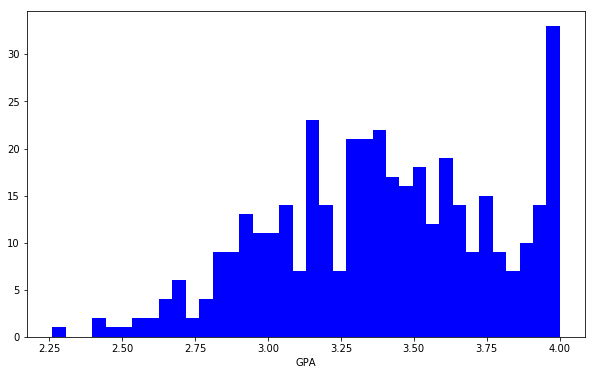

In [46]:
plt.figure(figsize=(10,6))
plt.hist(data['gpa'],bins=38,color='blue')
plt.xlabel('GPA')

Text(0.5, 0, 'GPA')

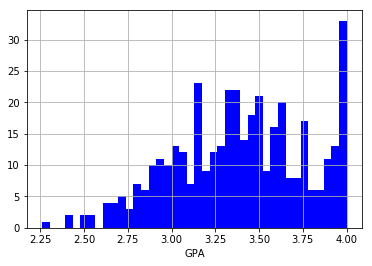

In [47]:
data['gpa'].hist(bins=40,color='blue')
plt.xlabel('GPA')

Text(0.5, 0, 'GRE score')

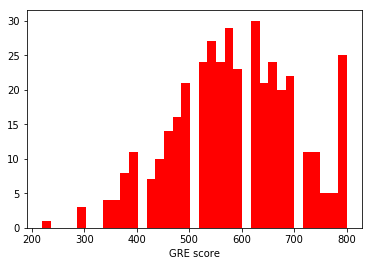

In [50]:
plt.hist(data['gre'],bins=35,color='red')
plt.xlabel('GRE score')

(array([273.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 127.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

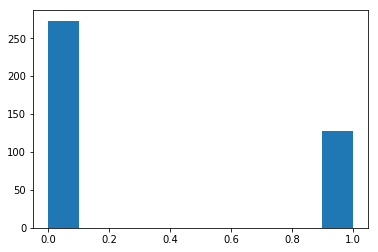

In [51]:
plt.hist(data['admit'])

(array([ 61.,   0.,   0., 151.,   0.,   0., 121.,   0.,   0.,  67.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

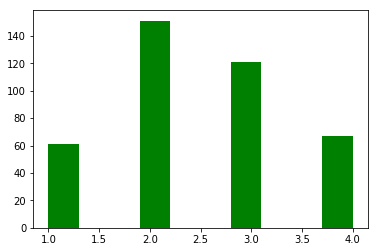

In [53]:
plt.hist(data['rank'],color='green')

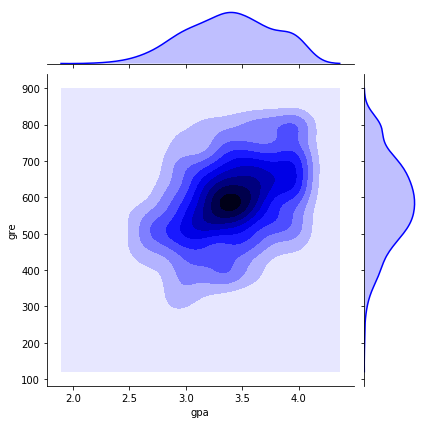

In [54]:
sb.jointplot(x='gpa',y='gre',data=data,color='blue',kind='kde')

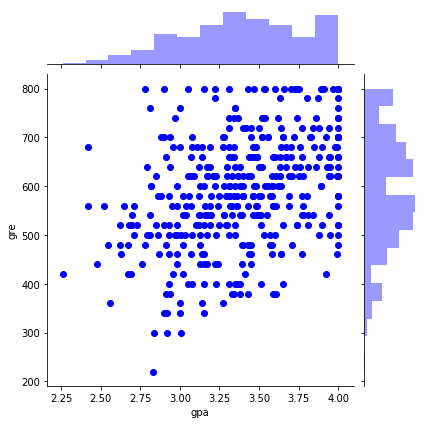

In [56]:
sb.jointplot(x='gpa',y='gre',data=data,color='blue')

In [57]:
dummy_ranks=pd.get_dummies(data['rank'],prefix='rank')
dummy_ranks.head()

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [58]:
cols=['admit','gre','gpa']
data1=data[cols].join(dummy_ranks.ix[:,'rank_2':])

C:\Users\wwwas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [59]:
data1.head()

,admit,gre,gpa,rank_2,rank_3,rank_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X=data1[['gre','gpa','rank_2','rank_3','rank_4']]
y=data1['admit']

In [62]:
xtr,xte,ytr,yte=train_test_split(X,y,test_size=0.3,random_state=23)

In [63]:
print (xtr.shape)

(280, 5)


In [65]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtr,ytr)

C:\Users\wwwas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
predictions=model.predict(xte)
predictions


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print (classification_report(yte,predictions))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        88
           1       0.50      0.28      0.36        32

   micro avg       0.73      0.73      0.73       120
   macro avg       0.64      0.59      0.60       120
weighted avg       0.70      0.73      0.71       120



In [87]:
X1=data[['gpa','gre']]
y1=data['admit']
xtr1,xte1,ytr1,yte1=train_test_split(X1,y1,test_size=0.3,random_state=23)
model1=LogisticRegression()
model1.fit(xtr1,ytr1)

C:\Users\wwwas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
prediction=model1.predict(xte1)

In [88]:
print (classification_report(yte1,prediction))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        88
           1       0.00      0.00      0.00        32

   micro avg       0.73      0.73      0.73       120
   macro avg       0.37      0.50      0.42       120
weighted avg       0.54      0.73      0.62       120



C:\Users\wwwas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wwwas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\wwwas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
